In [1]:
from definitions import *

In [2]:
a, b = (-1, 0), (1, 0.1)

dataset1 = generate_dataset(10 ** 5, random_point_in_rect(1000))
dataset2 = generate_dataset(10 ** 5, random_point_in_rect(10 ** 14))
dataset3 = generate_dataset(1000, random_point_on_circle(100))
dataset4 = generate_dataset(1000, random_point_on_line(a, b, (-1000, 1000)))

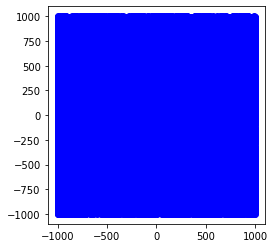

In [3]:
plot({ 'points': dataset1 })

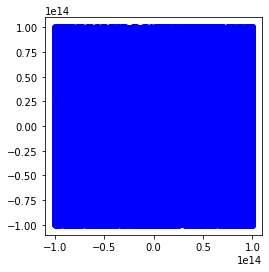

In [4]:
plot({ 'points': dataset2 })

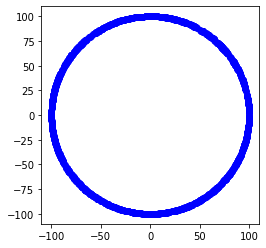

In [5]:
plot({ 'points': dataset3 })

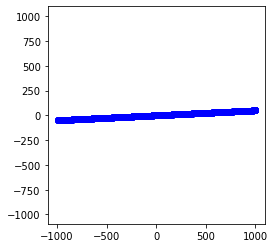

In [6]:
plot({ 'points': dataset4 })

In [7]:
def det1(a, b, c):
    (ax, ay) = a
    (bx, by) = b
    (cx, cy) = c
    return ax * by + ay * cx + bx * cy - by * cx - cy * ax - ay * bx

def det2(a, b, c):
    (ax, ay) = a
    (bx, by) = b
    (cx, cy) = c
    return (ax - cx) * (by - cy) - (ay - cy) * (bx - cx)

In [8]:
def split(dataset, det, eps=0):
    L, R, EQ = [], [], []
    for point in dataset:
        d = det(a, b, point)
        if abs(d) < eps: EQ.append(point)
        elif d > 0: L.append(point) 
        else: R.append(point)
    return L, EQ, R

In [9]:
def show_cmp(dataset, det_method, eps=0):
    result = split(dataset, det_method, eps)
    L, EQ, R = result
    plot(
        { 'points': R, 'color': 'red' },
        { 'points': L, 'color': 'blue' },
        { 'points': EQ, 'color': 'green' }
    )
    L, EQ, R = tuple(map(len, result))
    print ('L', L, 'R', R, 'EQ', EQ)

In [10]:
def show_cmp_text(dataset, label, eps=0):
    def count(result):
        L, EQ, R = tuple(map(len, result))
        return { 'L': L, 'EQ': EQ, 'R': R }
    result1 = count(split(dataset, det1, eps))
    result2 = count(split(dataset, det2, eps))
    print (label)
    print ('det1:', result1)
    print ('det2:', result2)
    print ('')
    

## Porównywanie wyników
* bez epsilon

In [11]:
show_cmp_text(dataset1, 'dataset1')
show_cmp_text(dataset2, 'dataset2')
show_cmp_text(dataset3, 'dataset3')
show_cmp_text(dataset4, 'dataset4')

dataset1
det1: {'L': 49867, 'EQ': 0, 'R': 50133}
det2: {'L': 49867, 'EQ': 0, 'R': 50133}

dataset2
det1: {'L': 50025, 'EQ': 0, 'R': 49975}
det2: {'L': 50024, 'EQ': 0, 'R': 49976}

dataset3
det1: {'L': 495, 'EQ': 0, 'R': 505}
det2: {'L': 495, 'EQ': 0, 'R': 505}

dataset4
det1: {'L': 166, 'EQ': 0, 'R': 834}
det2: {'L': 145, 'EQ': 0, 'R': 855}



* epsilon = $10^{-14}$

In [12]:
show_cmp_text(dataset1, 'dataset1', 10 ** -14)
show_cmp_text(dataset2, 'dataset2', 10 ** -14)
show_cmp_text(dataset3, 'dataset3', 10 ** -14)
show_cmp_text(dataset4, 'dataset4', 10 ** -14)

dataset1
det1: {'L': 49867, 'EQ': 0, 'R': 50133}
det2: {'L': 49867, 'EQ': 0, 'R': 50133}

dataset2
det1: {'L': 50025, 'EQ': 0, 'R': 49975}
det2: {'L': 50024, 'EQ': 2, 'R': 49974}

dataset3
det1: {'L': 495, 'EQ': 0, 'R': 505}
det2: {'L': 495, 'EQ': 0, 'R': 505}

dataset4
det1: {'L': 0, 'EQ': 1000, 'R': 0}
det2: {'L': 130, 'EQ': 721, 'R': 149}



## Wizualizacje klasyfikacji zbiorów

In [13]:
# Konfiguracja dla wszystkich poniżyszych wizualizacji
det = det1  
eps = 10 ** -14

L 49867 R 50133 EQ 0


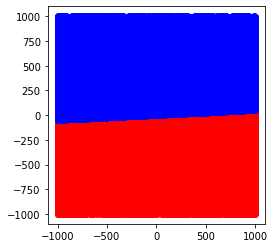

In [14]:
show_cmp(dataset1, det, eps)

L 50025 R 49975 EQ 0


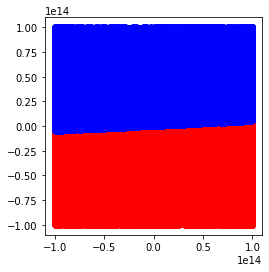

In [15]:
show_cmp(dataset2, det, eps)

L 495 R 505 EQ 0


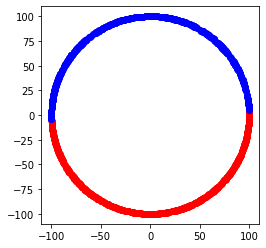

In [16]:
show_cmp(dataset3, det, eps)

L 0 R 0 EQ 1000


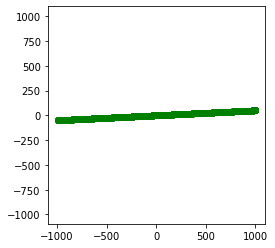

In [17]:
show_cmp(dataset4, det, eps)